In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [2]:
data = pd.read_csv("C:/Springboard_Data_Science/Data_for_project/Wind_Energy/T1.csv")

In [3]:
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
from datetime import datetime
date_format = "%d %m %Y %H:%M"
data["Date/Time"] = [datetime.strptime(date_str, date_format) for date_str in data["Date/Time"]]

In [5]:
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645904,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/Time                      50530 non-null  datetime64[ns]
 1   LV ActivePower (kW)            50530 non-null  float64       
 2   Wind Speed (m/s)               50530 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64       
 4   Wind Direction (°)             50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [7]:
data.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [8]:
data.describe()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530,50530.000000,50530.000000,50530.000000,50530.000000
mean,2018-07-01 20:01:30.065307648,1307.684332,7.557952,1492.175463,123.687559
min,2018-01-01 00:00:00,-2.471405,0.000000,0.000000,0.000000
25%,2018-04-03 05:22:30,50.677890,4.201395,161.328167,49.315437
50%,2018-06-30 16:15:00,825.838074,7.104594,1063.776282,73.712978
75%,2018-09-26 18:57:30,2482.507568,10.300020,2964.972462,201.696720
max,2018-12-31 23:50:00,3618.732910,25.206011,3600.000000,359.997589
std,NaN,1312.459242,4.227166,1368.018238,93.443736


In [9]:
data.head(2)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113


In [10]:
data = data[(data["Wind Speed (m/s)"] >= 0) & (data["LV ActivePower (kW)"] >= 0) & (data["Theoretical_Power_Curve (KWh)"]>=0) & (data["Wind Direction (°)"]>=0)]

In [11]:
data.columns

Index(['Date/Time', 'LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50473 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/Time                      50473 non-null  datetime64[ns]
 1   LV ActivePower (kW)            50473 non-null  float64       
 2   Wind Speed (m/s)               50473 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50473 non-null  float64       
 4   Wind Direction (°)             50473 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.3 MB


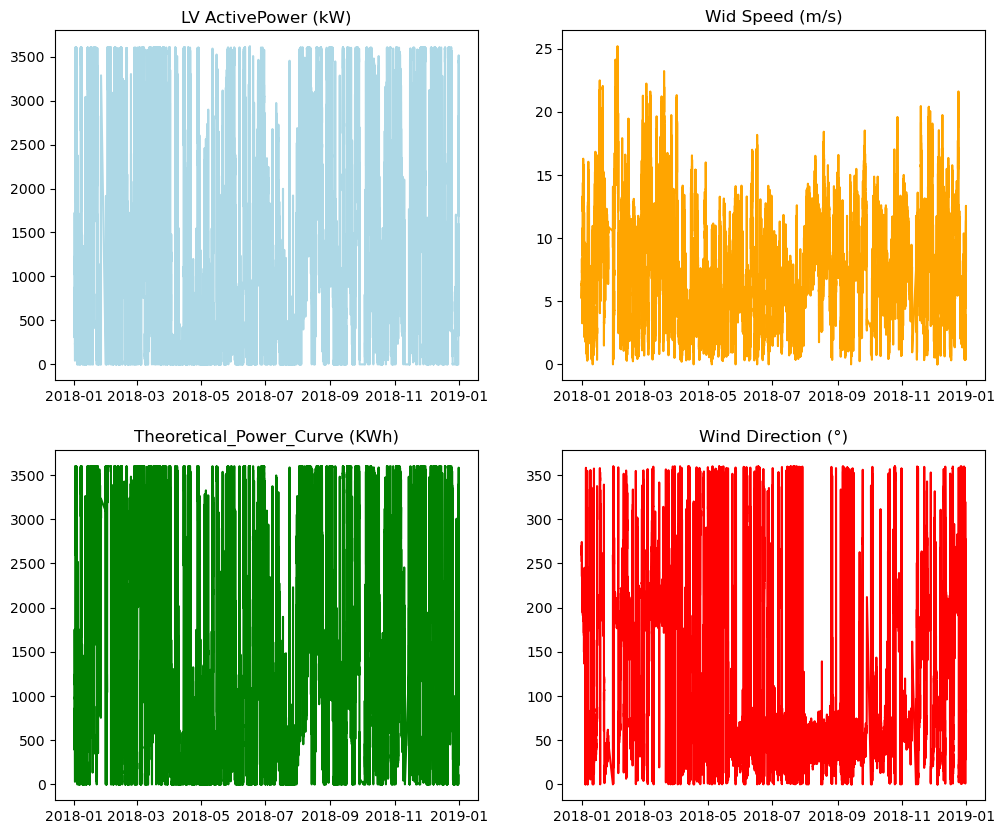

In [13]:
fig, axs = plt.subplots(nrows= 2, ncols= 2, figsize=(12,10))
axs[0, 0].plot(data["Date/Time"], data["LV ActivePower (kW)"], color="lightblue")
axs[0, 0].set_title('LV ActivePower (kW)')
axs[0, 1].plot(data["Date/Time"], data["Wind Speed (m/s)"], color="orange")
axs[0, 1].set_title('Wid Speed (m/s)')

axs[1, 0].plot(data["Date/Time"], data["Theoretical_Power_Curve (KWh)"], c="green")
axs[1, 0].set_title('Theoretical_Power_Curve (KWh)')
axs[1, 1].plot(data["Date/Time"], data["Wind Direction (°)"], c="red")
axs[1, 1].set_title('Wind Direction (°)')
plt.show()

In [14]:
data.groupby("Date/Time")[["LV ActivePower (kW)","Wind Speed (m/s)","Theoretical_Power_Curve (KWh)","Wind Direction (°)"]].mean()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Date/Time,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645904,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500


In [15]:
data.columns = ["Time","Active_Power","Wind_Speed","Theorotical_Power","Wind_Direction"]

In [16]:
data.head()

,Time,Active_Power,Wind_Speed,Theorotical_Power,Wind_Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645904,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [17]:
data.isnull().values.any() # There is no Nan values

False

In [18]:
duplicates = data.duplicated(subset=data.columns,keep=False)

In [19]:
data[duplicates] # There is no duplicated values

,Time,Active_Power,Wind_Speed,Theorotical_Power,Wind_Direction


In [20]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Time,50473,2018-07-01 20:58:44.799397632,2018-01-01 00:00:00,2018-04-03 07:20:00,2018-06-30 17:10:00,2018-09-26 19:20:00,2018-12-31 23:50:00,NaN
Active_Power,50473.0,1309.161489,0.0,52.74054,828.006714,2484.364014,3618.73291,1312.463427
Wind_Speed,50473.0,7.563317,0.0,4.210382,7.111886,10.30341,25.206011,4.226509
Theorotical_Power,50473.0,1493.846082,0.0,163.084179,1067.1613,2966.774233,3600.0,1367.885865
Wind_Direction,50473.0,123.648102,0.0,49.304878,73.660377,201.684006,359.997589,93.446383


In [21]:
data[data.Active_Power>data.Theorotical_Power]

,Time,Active_Power,Wind_Speed,Theorotical_Power,Wind_Direction
19,2018-01-01 03:10:00,787.246216,6.437531,781.771216,257.560211
20,2018-01-01 03:20:00,722.864075,6.220024,700.764700,255.926498
28,2018-01-01 04:40:00,1098.932007,7.101376,1062.285034,245.095596
29,2018-01-01 04:50:00,1021.458008,6.955307,995.995855,245.410202
30,2018-01-01 05:00:00,1164.892944,7.098298,1060.859712,235.227905
...,...,...,...,...,...
50516,2018-12-31 21:40:00,1992.348999,8.433422,1787.100338,80.132507
50526,2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
50527,2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500
50528,2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913


In [22]:
data.loc[data["Wind_Direction"]>360, "Wind_Direction"] # Wind direction can be maxiumum 360 

Series([], Name: Wind_Direction, dtype: float64)

In [23]:
data.head()

,Time,Active_Power,Wind_Speed,Theorotical_Power,Wind_Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645904,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


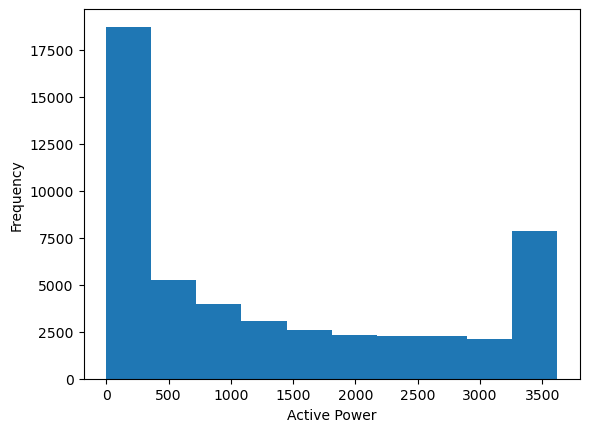

In [24]:
plt.hist(data["Active_Power"], bins=10)
plt.xlabel("Active Power")
plt.ylabel("Frequency")
plt.show()

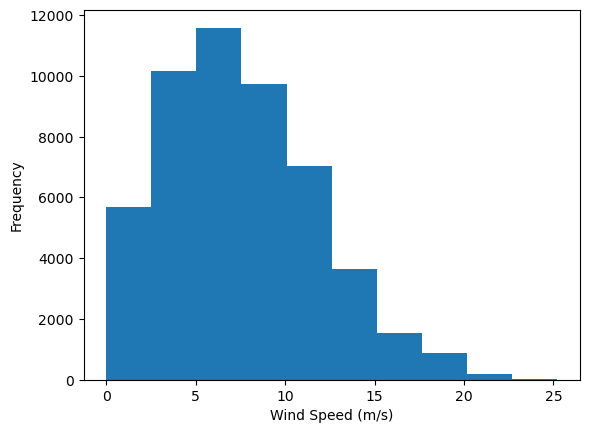

In [25]:
plt.hist(data["Wind_Speed"], bins=10)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

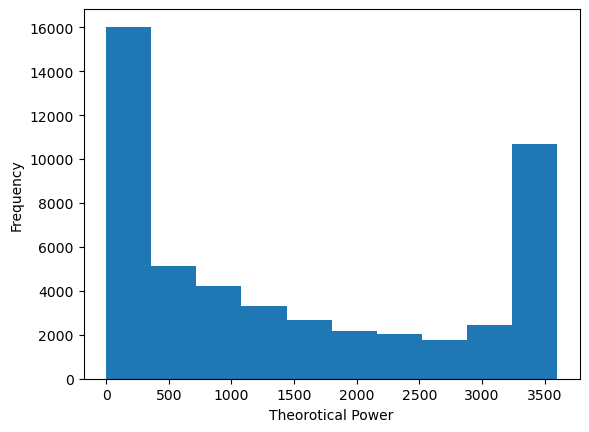

In [26]:
plt.hist(data["Theorotical_Power"], bins=10)
plt.xlabel("Theorotical Power")
plt.ylabel("Frequency")
plt.show()

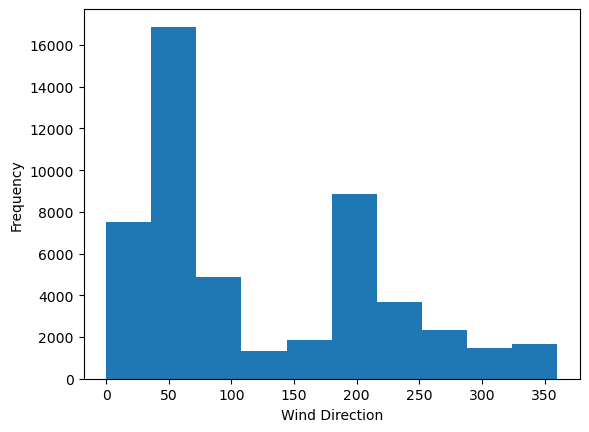

In [27]:
plt.hist(data["Wind_Direction"], bins=10)
plt.xlabel("Wind Direction")
plt.ylabel("Frequency")
plt.show()

In [28]:
data.columns

Index(['Time', 'Active_Power', 'Wind_Speed', 'Theorotical_Power',
       'Wind_Direction'],
      dtype='object')

In [29]:
x2 = data.drop(["Active_Power","Time"],axis=1)
y = data["Active_Power"]
print(x2.head())
print(y.head())

   Wind_Speed  Theorotical_Power  Wind_Direction
0    5.311336         416.328908      259.994904
1    5.672167         519.917511      268.641113
2    5.216037         390.900016      272.564789
3    5.659674         516.127569      271.258087
4    5.577941         491.702972      265.674286
0    380.047791
1    453.769196
2    306.376587
3    419.645904
4    380.650696
Name: Active_Power, dtype: float64


In [30]:
X = (x2 - np.min(x2))/(np.max(x2)-np.min(x2))

print("Before Normalization:\n")
print(x2.head())

print(100*"*")

print("After Normalization\n")

print(X.head())


Before Normalization:

   Wind_Speed  Theorotical_Power  Wind_Direction
0    5.311336         416.328908      259.994904
1    5.672167         519.917511      268.641113
2    5.216037         390.900016      272.564789
3    5.659674         516.127569      271.258087
4    5.577941         491.702972      265.674286
****************************************************************************************************
After Normalization

   Wind_Speed  Theorotical_Power  Wind_Direction
0    0.001475           0.115647        0.072221
1    0.001576           0.144422        0.074623
2    0.001449           0.108583        0.075712
3    0.001572           0.143369        0.075349
4    0.001549           0.136584        0.073798


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [32]:
knn = KNeighborsRegressor(n_neighbors = 20)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print("K=20  Accuraty Rate: ", knn.score(X_test, y_test))

K=20  Accuraty Rate:  0.9213797736167572


The validation test results for K= 1 : % 84.98259996373409  
The validation test results for K= 2 : % 88.45008161196833  
The validation test results for K= 3 : % 89.64610148548486  
The validation test results for K= 4 : % 90.51839702913502  
The validation test results for K= 5 : % 91.09618566306663  
The validation test results for K= 6 : % 91.31861107068589  
The validation test results for K= 7 : % 91.46622527870572  
The validation test results for K= 8 : % 91.618125675021  
The validation test results for K= 9 : % 91.66487396373432  
The validation test results for K= 10 : % 91.77404237463881  
The validation test results for K= 11 : % 91.77284847655697  
The validation test results for K= 12 : % 91.85082443780033  
The validation test results for K= 13 : % 91.88491821585136  
The validation test results for K= 14 : % 91.91340145629482  
The validation test results for K= 15 : % 91.89934459023534  
The validation test results for K= 16 : % 91.93729183652715  
The validation test

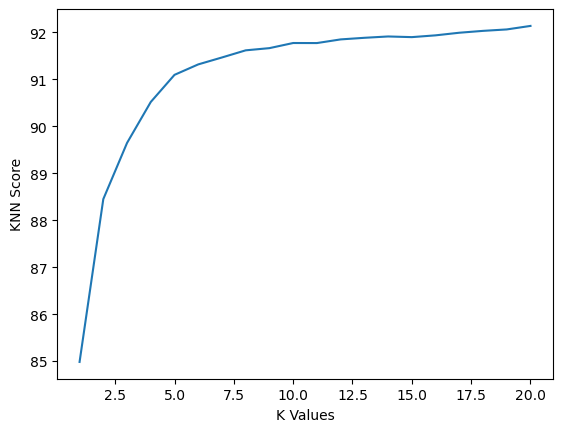

In [33]:
# How can we decide the number?
# let's find the best k number for our dataset
k_values = range(1,21)
my_list = []
for i in range(1,21):
    KNN = KNeighborsRegressor(n_neighbors= i) # n_neighbors = k
    KNN.fit(X_train,y_train)
    prediciton = KNN.predict(X_test)
    print(f"The validation test results for K= {i} : % {KNN.score(X_test,y_test)*100}  ")
    my_list.append({KNN.score(X_test,y_test)*100})
    
numeric_list = [value for s in my_list for value in s]

plt.plot(k_values,numeric_list)
plt.xlabel("K Values")
plt.ylabel("KNN Score")
plt.show()    


In [34]:
# We can choose 20 for k number it means the machine estimates around 92% correctly

In [35]:
data.head(2)

,Time,Active_Power,Wind_Speed,Theorotical_Power,Wind_Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113


In [36]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
# let's predict
new_data = np.array([5.311336,416.328908,259.994904])
new_data = (new_data - np.min(x2)) / (np.max(x2) - np.min(x2))
predicted_outcome = KNN.predict([new_data])
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: [349.25118103]


In [37]:
new_data = np.array([5.672167,519.917511,268.641113])
new_data = (new_data - np.min(x2)) / (np.max(x2) - np.min(x2))
predicted_outcome = KNN.predict([new_data])
print("Predicted Outcome:", predicted_outcome)

Predicted Outcome: [455.49565582]


In [38]:
# Linear Regression

In [39]:
reg = LinearRegression()

In [40]:
reg.fit(X_train,y_train)

LinearRegression()

In [41]:
reg.coef_

array([157556.15148863,   2829.76512832,   1464.6559572 ])

In [42]:
reg.intercept_

-246.57054747876305

In [43]:
# y = mx +n

In [44]:
X_train.head(1)

,Wind_Speed,Theorotical_Power,Wind_Direction
10895,0.001938,0.279259,0.0196


In [45]:
def Power(Wind_Speed,Theorotical_Power,Wind_Direction):
    Wind_Speed2 = (Wind_Speed - np.min(x2)) / (np.max(x2) - np.min(x2))
    Theorotical_Power2 = (Theorotical_Power - np.min(x2)) / (np.max(x2) - np.min(x2))
    Wind_Direction2 = (Wind_Direction - np.min(x2)) / (np.max(x2) - np.min(x2))
    LV_active = 157556.15148863* Wind_Speed2 + 2829.76512832*Theorotical_Power2 + 1464.6559572*Wind_Direction2 -246.57054747876305
    return LV_active

In [46]:
data.head(2)

,Time,Active_Power,Wind_Speed,Theorotical_Power,Wind_Direction
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113


In [47]:
Power(5.672167,519.917511,268.641113)

519.6505780367443

In [48]:
Power(5.311336,416.328908,259.994904)

418.9154997929596

In [49]:
reg.score(X_test,y_test) 

0.911221912154964

In [50]:
# The machine estimates around 91% correctly